# CARDIO GOOD FITNESS

## Content

Cardio good fitness is a retail store that deals in treadmills for a wide range of clients. They currently have three types of treadmills in stock TM195, TM498 and TM798. The retail store is looking for ways to boost sales this year. They intend to focus on all three types or focus on the brand that brings in more sales. 


## Expectation :

Develop a customer profile (characteristics of a customer) of the different products

Perform univariate, bivariate and multivariate analyses

Generate a set of insights and recommendations that will help the company in targeting new customers

In [283]:
#Library to supress warnings.
import warnings
warnings.filterwarnings('ignore')

#Library ro help reading,manipulation and visualization data. 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes = True)
%matplotlib inline

In [284]:
#Loading of data set.
cardio = pd.read_csv('CardioGoodFitness.csv')


# Overview of data

In [285]:
#Give the number of rows and columns.
cardio.shape

(180, 9)

 The data is made up of 180 rows and 9 columns

In [286]:
#Give the type of data
cardio.dtypes.value_counts()

int64     6
object    3
dtype: int64

There are 6 integers and 3 objects.

In [287]:
#Data type of all variables.
cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


All the columns have 180 observation indicating there are no missing values.

However Product,Gender and Maritalstatus must be converted to categorical.

In [288]:
#Changing categorical columns to categorical type
#Very necessary during model building
Cardio['Product'] = Cardio.Product.astype('category')
Cardio['Gender']= Cardio.Gender.astype('category')
Cardio['MaritalStatus'] = Cardio.MaritalStatus.astype('category')

In [289]:
Cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 9.5 KB


Now there are 3 category and 6 integers after the change.


In [290]:
cardio.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [291]:
#Check if there are missing values
cardio.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

There are no missing values in the data.



In [292]:
Cardio.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


There might be outliers in income and miles due to the huge difference in 75% quartile and the maximum value.

All the above variables are numerical

# Univariate analysis of variables

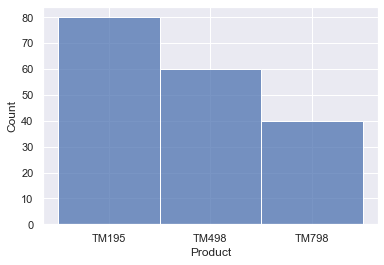

In [293]:
sns.histplot(cardio.Product);

The most count brand is TM195

TM798 has the least count.

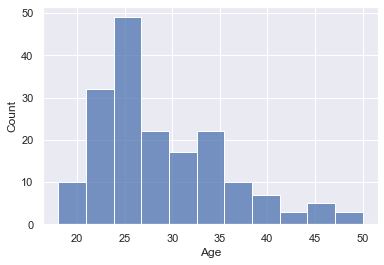

In [294]:
sns.histplot(cardio.Age);

25 is the mean age for this data.

<AxesSubplot:xlabel='Age'>

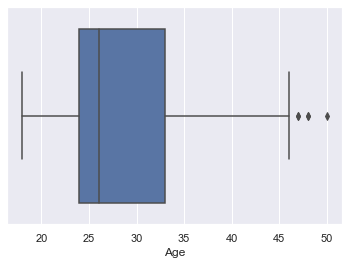

In [295]:
sns.boxplot(cardio.Age)

Age is skewed to the left 

26 is the mean when box plot is used 

Outliers present which affects the various percentiles.

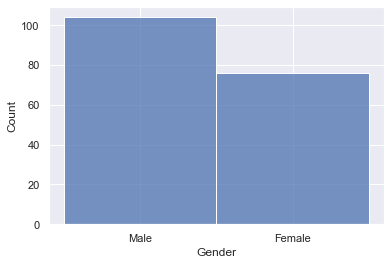

In [296]:
sns.histplot(cardio.Gender);

27% more males than females in the distrubution 

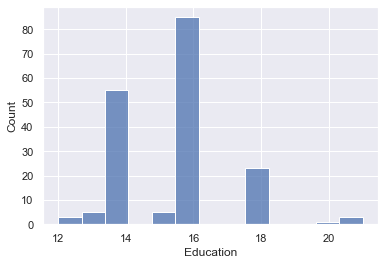

In [297]:
sns.histplot(cardio.Education);

<AxesSubplot:xlabel='Education'>

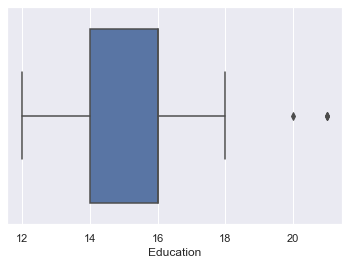

In [298]:
sns.boxplot(cardio.Education)

mean and median is equal

Few outliers are present to the right

25th and 75th percentiles are 12 and 18 respectively

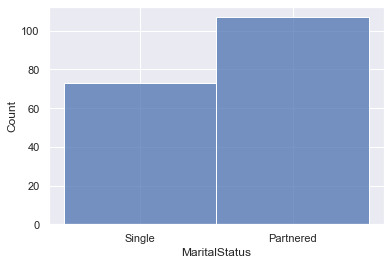

In [299]:
sns.histplot(cardio.MaritalStatus);

Partners are more than singles in the distribution

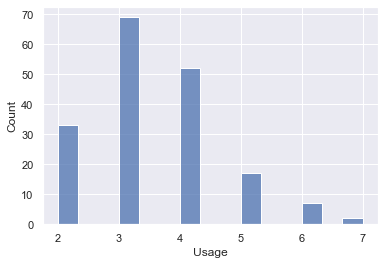

In [300]:
sns.histplot(cardio.Usage);

Majority of clients use the product three times in a week and the lowest is seven times.

<AxesSubplot:xlabel='Usage'>

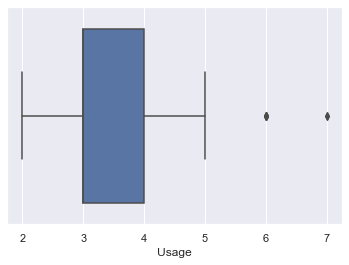

In [301]:
sns.boxplot(cardio.Usage)

Zero skewed because mean equals median

Outliers present which affect mean and median

25th and 75th percentiles are 2 and 5 respectively.

The distribution is similar to Eduacation. It suggest possible correlation between the two variables.

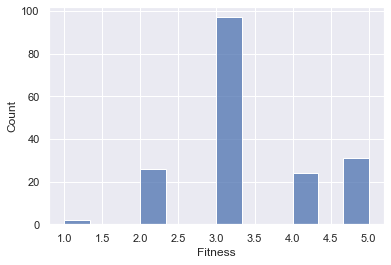

In [302]:
sns.histplot(cardio.Fitness);

Most of the clients fitness level was at 3.

<AxesSubplot:xlabel='Fitness'>

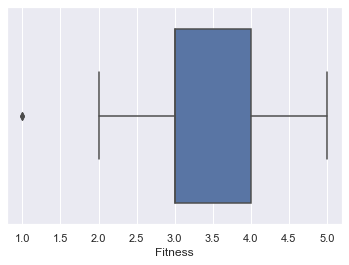

In [303]:
sns.boxplot(cardio.Fitness)

Zero skewed because mean equals median
Outlier present.

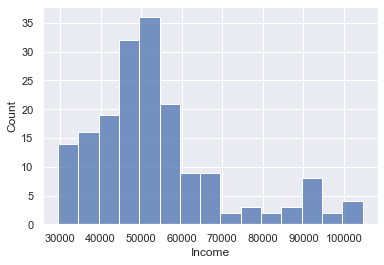

In [304]:
sns.histplot(cardio.Income);

<AxesSubplot:xlabel='Income'>

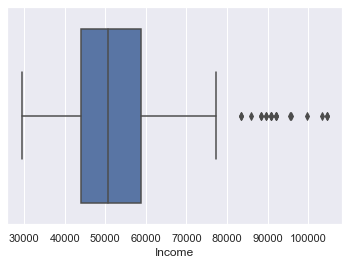

In [305]:
sns.boxplot(cardio.Income)

Negatively skewed 
Outliers present at the right.

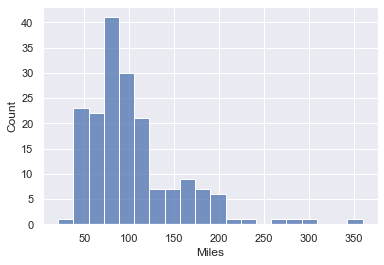

In [306]:
sns.histplot(cardio.Miles);

Mean miles run on the product is in 90.
Skewed to the left

<AxesSubplot:xlabel='Miles'>

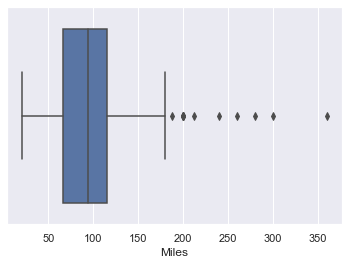

In [307]:
sns.boxplot(cardio.Miles)

Outliers present on the right.
Mean must be 90 miles.

# Bivariate analysis of data

<AxesSubplot:xlabel='Product', ylabel='Age'>

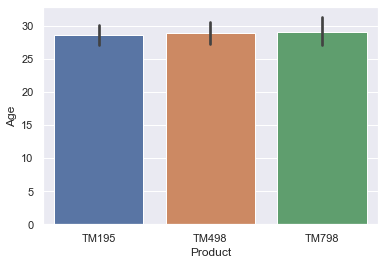

In [308]:
sns.barplot(x= 'Product', y='Age', data = cardio)

All the brands are almost in the same age bracket.

<AxesSubplot:xlabel='Product', ylabel='Age'>

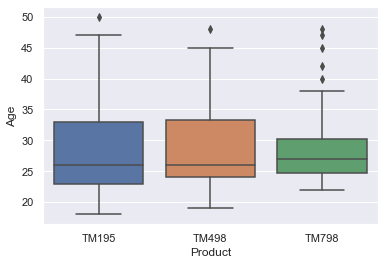

In [309]:
sns.boxplot(x= 'Product', y='Age', data = cardio)

Outliers present
Mean is close across all brands.

<AxesSubplot:xlabel='Product', ylabel='Education'>

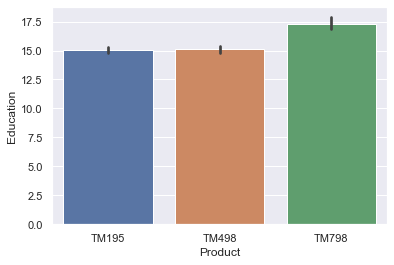

In [310]:
sns.barplot(x='Product',y ='Education', data=cardio)

Education doesnt really have an impact on the type of product eventhough clients with higher education prefer TM798

<AxesSubplot:xlabel='Product', ylabel='Usage'>

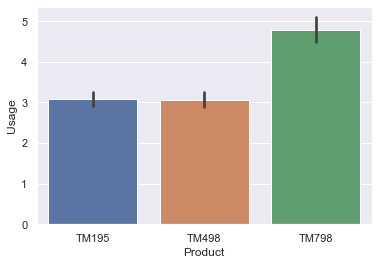

In [311]:
sns.barplot(x='Product',y ='Usage', data=cardio)

Usage is higher in TM798 owners than the rest.
Level of usage for TM195 and TM498 is around 3.

<AxesSubplot:xlabel='Product', ylabel='Fitness'>

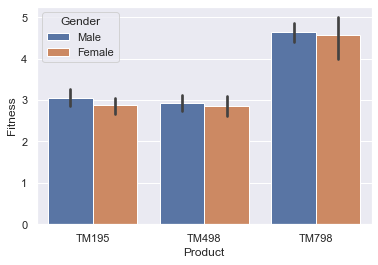

In [312]:
sns.barplot(x='Product',y ='Fitness', data=cardio, hue='Gender')

Users of TM798 have higher fitness level than TM195 and TM498.
Fitness level of males is slightly higher than females in all products.

<AxesSubplot:xlabel='Product', ylabel='Income'>

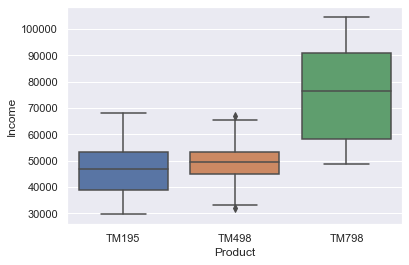

In [313]:
sns.boxplot(x='Product',y ='Income', data=cardio)

There are no outliers in TM195 and TM798 income 
The mean for TM195 and TM498 is almost close but that of TM798 is around 78000.

<AxesSubplot:xlabel='Product', ylabel='Miles'>

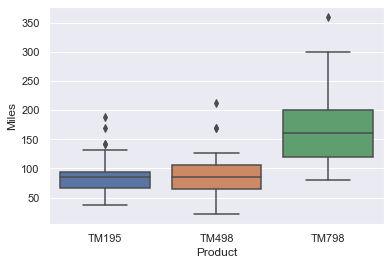

In [314]:
sns.boxplot(x='Product',y ='Miles', data=cardio,)

There are outliers in all the product types which will have sigificant effect on the mean. 
TM798 has more miles than other brands.

<AxesSubplot:xlabel='Gender', ylabel='Age'>

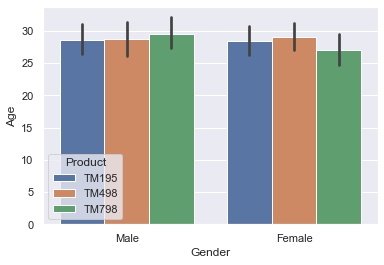

In [315]:
sns.barplot(x='Gender',y ='Age', data=cardio,hue= 'Product')

Age and Gender dont have any significant effect on choice of product.

<AxesSubplot:xlabel='Fitness', ylabel='Usage'>

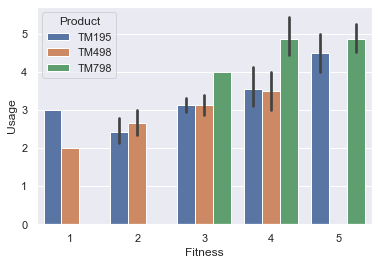

In [316]:
sns.barplot(x='Fitness',y ='Usaget.', data=cardio,hue= 'Product')

Frequent usage is matched up with high fitness
TM195 and TM498 have lower usage.

<AxesSubplot:xlabel='Fitness', ylabel='Education'>

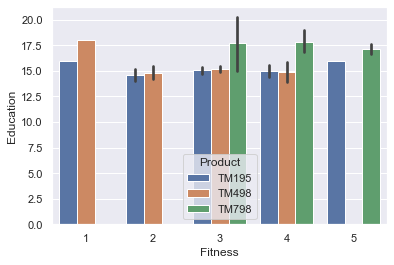

In [317]:
sns.barplot(x='Fitness',y ='Education', data=cardio,hue= 'Product')

Clients with high education have high level of fitness.
Clients with high education prefer TM798


<AxesSubplot:xlabel='Fitness', ylabel='MaritalStatus'>

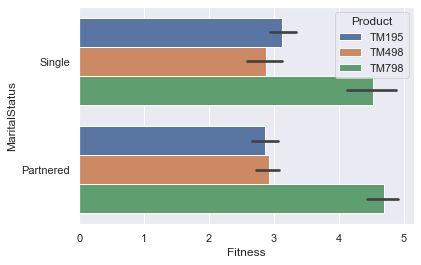

In [318]:
sns.barplot(x='Fitness',y ='MaritalStatus', data=cardio,hue= 'Product')

Both Single and partnered prefered TM798 

# Multivariate analysis of data

In [319]:
#check correlation between the numerical variables
cardio.corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


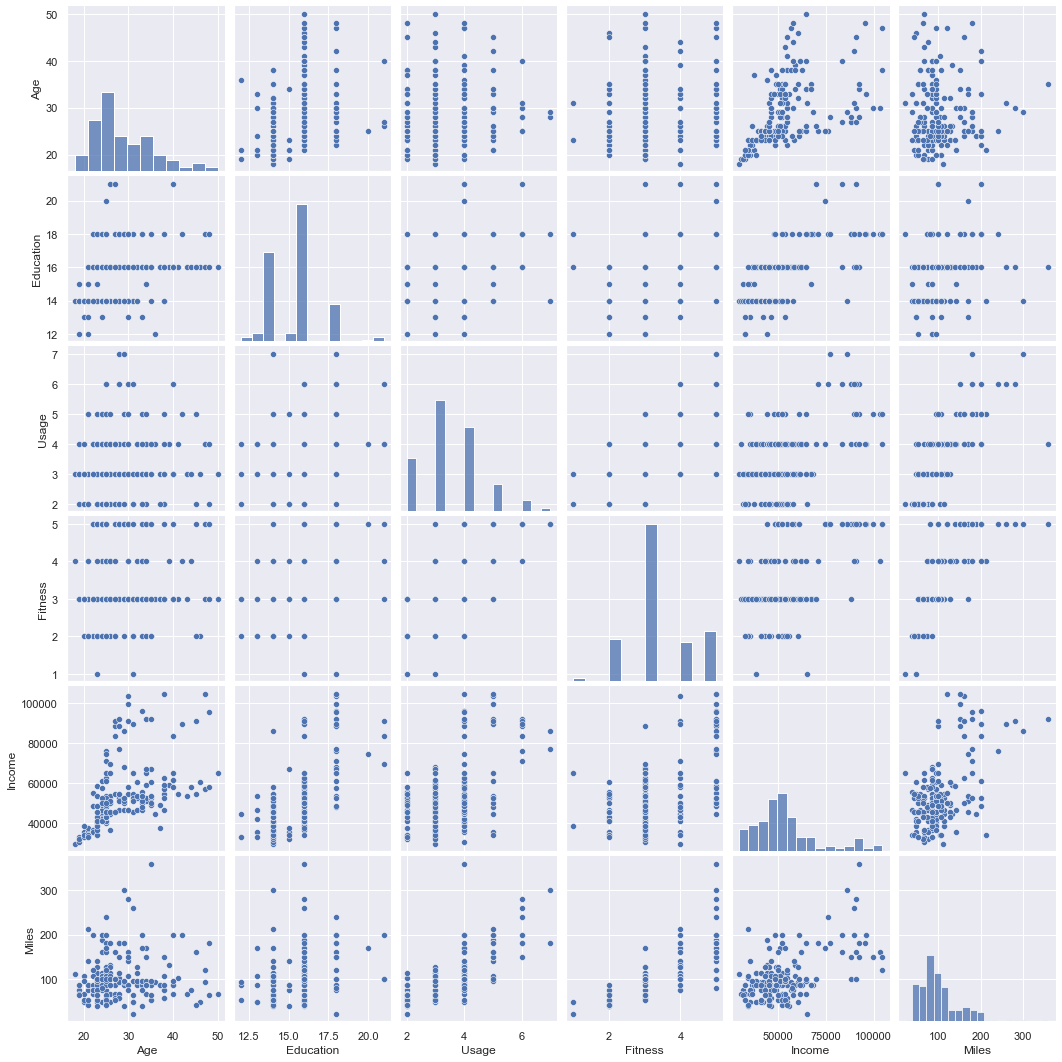

In [320]:
# Gives a graphical depiction of correlation between numerical variables
sns.pairplot(cardio)

<AxesSubplot:>

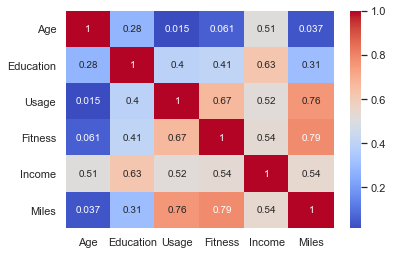

In [321]:
sns.heatmap(cardio.corr(), annot=True, cmap="coolwarm")

There is high correlation between miles and usage.
Fitness is also expected to have a high correlation with miles.
Positive correlation also exist between fitness and usage.
Fairly high correlation also exist between income and education.
No negative correlation exist in map above, although the lowest is usage and age.

In [322]:
# This gives an analysis of the data
from pandas_profiling import ProfileReport
prof = ProfileReport(cardio)
prof

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Conclusion

Users of TM798 have the highest fitness

Users of TM798 have the highest usage

High fitness is as  results of high usage of treadmill not necessarily the brand.

Clients who barely used the TM195 and TM498 were not deemed fit according to the data.

Clients with higher education and income preferred the TM798.

Males were more fit than females irrespective of the brand.
 
# Recommendation

Target market for the treadmill are males, high education and high income(80K above).

Must look into the reason why owners of TM798 use their treadmill ,whether its easy to operate or exercise or more enhanced features.

There could be further investigation into how long clients have used their treadmill or which year it was purchased.

There should also be data on location of clients since that can also impact sales and the use of treadmill.

Information on discount on purchases and replacement should be available.

